# 1. Introduction

Nikki Satmaka - Batch 11

## Description

Dataset is taken from [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn)

Context:

This dataset contains

1. `customerID` : A unique ID that identifies each customer.
1. `gender` : The customer’s gender: Male, Female
1. `SeniorCitizen` : Indicates if the customer is 65 or older: 1 = Senior Citizen, 0 = Not Senior Citizen
1. `Partner` : Indicates if the customer is married: Yes, No
1. `Dependents` : Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
1. `tenure` :  Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
1. `PhoneService` : Indicates if the customer subscribes to home phone service with the company: Yes, No
1. `MultipleLines` : Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No, No phone service
1. `InternetService` : Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic
1. `OnlineSecurity` : Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No, No internet service
1. `OnlineBackup` : Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No, No internet service
1. `DeviceProtection` : Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No, No internet service
1. `TechSupport` : Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No, No internet service
1. `StreamingTV` : Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No, No internet service
1. `StreamingMovies` : Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No, No internet service
1. `Contract` : Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
1. `PaperlessBilling` : Indicates if the customer has chosen paperless billing: Yes, No
1. `PaymentMethod` : Indicates how the customer pays their bill: Bank Transfer, Credit Card, Electronic Check, Mailed Check
1. `MonthlyCharges` : Indicates the customer’s current total monthly charge for all their services from the company.
1. `TotalCharges` : Indicates the customer’s total charges, calculated to the end of the quarter specified above.
1. `Churn` : Yes = the customer left the company this quarter. No = the customer remained with the company.

### Objective

- pass

### Problem Statement

- pass

# 2. Importing Libraries

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from pathlib import Path

# Useful functions
from packages.checker import check_missing, check_missing_special
from packages.outlier_handling import check_outlier, outlier_summary
from packages.outlier_handling import trim_cap_outliers
from packages.imputation_handling import prepare_imputation

from pandas_profiling import ProfileReport

import joblib

import warnings
warnings.filterwarnings('ignore')

# For Handling outlier
from feature_engine.outliers import OutlierTrimmer
from feature_engine.outliers import Winsorizer
from feature_engine.outliers import ArbitraryOutlierCapper

# For Handling Missing Values
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import RandomSampleImputer
from feature_engine.imputation import CategoricalImputer
from feature_engine.imputation import ArbitraryNumberImputer

# For Data Preprocessing
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

# Neural Network
from tensorflow import keras

# For Classification Problems
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Evaluate Classification Models
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import auc


pd.set_option('display.precision', 2)

sns.set_theme(style='darkgrid', palette='Set1')

np.random.seed(42)

%matplotlib inline

# 3. Data Loading

In [2]:
# load dataset
df_ori = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = df_ori.copy()

# display the first 5 entries of the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# display the last 5 entries of the data
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


## Data Understanding

In [4]:
# check dataset shape
df.shape

(7043, 21)

There are 7043 instances and 21 columns of data

In [5]:
# check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


This is weird. Why would `TotalCharges` have `object` as a dtype? It should be similar to `MonthlyCharges` which is `float64`\
Let's see the unique values

In [6]:
# check unique values for `TotalCharges` feature
print(df['TotalCharges'].unique())

['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


Glancing at the unique values, it's clear that they're numbers, but quoted as string.\
Let's convert `TotalCharges` to `float64` and pass any errors as `NaN`

In [7]:
# convert `TotalCharges` to numeric and pass any non-numeric values as NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Let's check the info again

In [8]:
# check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# check missing values in dataset
check_missing(df)

,feats,tot_missing,tot_missing_pct
0,TotalCharges,11,0.16


Seems like those 11 missing values were the cause of that `object` data type\
We've got 0.16% missing values in `TotalCharges`

## Basic Characteristics of the Dataset

In [10]:
# check basic stats for numerical features
df.describe(percentiles=[0.5]).T

,count,mean,std,min,50%,max
SeniorCitizen,7043.0,0.16,0.37,0.00,0.00,1.00
tenure,7043.0,32.37,24.56,0.00,29.00,72.00
MonthlyCharges,7043.0,64.76,30.09,18.25,70.35,118.75
TotalCharges,7032.0,2283.30,2266.77,18.80,1397.47,8684.80


In [11]:
# check basic stats for features with object dtypes
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [12]:
# check the cardinality of each nominal and ordinal features
print("Nominal and ordinal features cardinality:")
for col in df.columns:
    if df[col].nunique() < 20:
        print(col, ':', df[col].nunique(), 'unique values \n', np.sort(df[col].unique()))
        print('-' * 100)

Nominal and ordinal features cardinality:
gender : 2 unique values 
 ['Female' 'Male']
----------------------------------------------------------------------------------------------------
SeniorCitizen : 2 unique values 
 [0 1]
----------------------------------------------------------------------------------------------------
Partner : 2 unique values 
 ['No' 'Yes']
----------------------------------------------------------------------------------------------------
Dependents : 2 unique values 
 ['No' 'Yes']
----------------------------------------------------------------------------------------------------
PhoneService : 2 unique values 
 ['No' 'Yes']
----------------------------------------------------------------------------------------------------
MultipleLines : 3 unique values 
 ['No' 'No phone service' 'Yes']
----------------------------------------------------------------------------------------------------
InternetService : 3 unique values 
 ['DSL' 'Fiber optic' 'No']
-------

Let's cover some basic stats of the features in the train set.
- `customerID`
    - Index
    - I'm going to drop this feature early on because it functions as an index and do not have any use as a predictor
- `gender`
    - Nominal feature
    - Most customers are Male
    - Two unique values
- `SeniorCitizen`
    - Nominal feature
    - Two unique values
    - Since it's either 0 or 1 and the median of the data is 0, the mode is also 0
    - Most customers are not senior citizens
- `Partner`
    - Nominal feature
    - Two unique values
    - Most customers do not have a partner
- `Dependents`
    - Nominal feature
    - Two unique values
    - Most customers do not have any dependents
- `tenure`
    - Numerical feature
    - Ranges from 0 to 72
    - Mean is higher than the median
    - Might be right skewed
- `PhoneService`
    - Nominal feature
    - Two unique values
    - Most customers have a phone service
- `MultipleLines`
    - Nominal feature
    - Three unique values
    - Most customers have do not have multiple lines
- `InternetService`
    - Nominal feature
    - Three unique values
    - Most customers have fiber optic internet service
- `OnlineSecurity`
    - Nominal feature
    - Three unique values
    - Most customers have do not have additional online security service
- `OnlineBackup`
    - Nominal feature
    - Three unique values
    - Most customers have do not have additional online backup service
- `DeviceProtection`
    - Nominal feature
    - Three unique values
    - Most customers have do not have additional device protection service
- `TechSupport`
    - Nominal feature
    - Three unique values
    - Most customers have do not have additional tech support service
- `StreamingTV`
    - Nominal feature
    - Three unique values
    - Most customers have do not have tv streaming service
- `StreamingMovies`
    - Nominal feature
    - Three unique values
    - Most customers have do not have movie streaming service
- `Contract`
    - Nominal feature
    - Three unique values
    - Most customers are on a month-to-month contract
- `PaperlessBilling`
    - Nominal feature
    - Two unique values
    - Most customers chose paperless billing
- `PaymentMethod`
    - Nominal feature
    - Four unique values
    - Most customers pay using electronic check
- `MonthlyCharges`
    - Numerical feature
    - Ranges from 18.25 to 118.75 per month
    - Mean is lower than the median
    - Might be left skewed
- `TotalCharges`
    - Numerical feature
    - Ranges from 18.80 to 8684.80
    - Mean is significantly higher than the median
    - Might be right skewed
- `Churn`
    - Target label

## Data Preparation

Drop `customerID` because it's an index

In [13]:
# drop `customerID` from the dataset
df = df.drop(['customerID'], axis=1)

## Check for Dataset Imbalance

Check whether the target variable of the dataset is balance

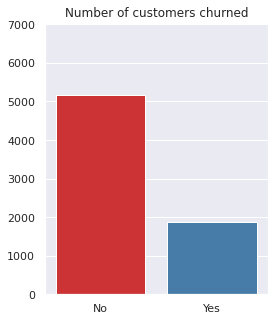

In [14]:
# check for imbalance in target variable
plt.figure(figsize=(4,5))
sns.countplot(data=df, x='Churn')
plt.title('Number of customers churned')
plt.xlabel(None)
plt.ylabel(None)
plt.ylim(0, df.shape[0])

plt.show()

We can see that most clients are not churned and the percentage of churned clients is less than 30% of the dataset.\
That means our dataset is imbalance and we need to stratify when splitting

## Splitting Dataset

We need to split the dataset into inference, train and test sets before we do any EDA.\
We do our EDA on the train set so as to not have any bias towards the whole dataset.

### Sample data for inference

In [15]:
# sample dataset for inference
df_inf = df.sample(10, random_state=42)

# remove inference set from original dataset
df_train_test = df.drop(df_inf.index).reset_index(drop=True)

# reset index for inference set
df_inf = df_inf.reset_index(drop=True)

print('df_inf Size:', df_inf.shape)

df_inf Size: (10, 20)


### Split train and test set


Since the target variable is imbalanced, we use stratified sampling

In [16]:
# we use stratified sampling to ensure that the distribution of the target variable is balanced
df_train, df_test = train_test_split(
    df_train_test,
    test_size=0.20,
    random_state=42,
    stratify=df_train_test['Churn']
)

print('df_train Size:', df_train.shape)
print('df_test Size:', df_test.shape)

df_train Size: (5626, 20)
df_test Size: (1407, 20)


In [17]:
# backup the train set that we are gonna perform EDA on
df_train_ori = df_train.copy()

# 4. Exploratory Data Analysis

## Subheading 1

## Subheading 2

## Subheading 3

# 5. Data Preprocessing

In [18]:
# restore the train set from the backup
df_train = df_train_ori.copy()

In [19]:
# split between features and target
X_train = df_train.drop(['Churn'], axis=1)
y_train = df_train['Churn'].copy()

X_test = df_test.drop(['Churn'], axis=1)
y_test = df_test['Churn'].copy()

## Categorizing Features

Categorize the features based on the variable type of the features and the data it represents
- Numeric (Interval): Features which have equally spaced interval between unique values
- Categorical (Nominal): Features which have no intrinsic ordering to the unique values
- Ordinal: Features which have clear ordering but do not have equally spaced intervals between unique values

In [20]:
# categorizing features
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

nom_cols = [
    'SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

ord_cols = []

## Handling Outliers

In [21]:
# check outlier summary only on numerical features
outlier_summary(X_train[num_cols], 1.5)

,feats,skew,dist,tot_outlier,tot_outlier_pct
0,tenure,0.24,normal,0,0.0
1,MonthlyCharges,-0.22,normal,0,0.0
2,TotalCharges,0.96,skewed,0,0.0


1. `Trimming`: if outliers' percentage < 5%
2. `Capping`: if outliers' percentage 5% - 15%
3. `None`: if outliers' percentage > 15%

In [22]:
# check outlier details
check_outlier(X_train[num_cols], 1.5)

,feats,upper_bound,lower_bound,tot_right_tail,tot_left_tail,tot_right_tail_pct,tot_left_tail_pct,tot_outlier,tot_outlier_pct
0,tenure,105.96,-41.14,0,0,0.0,0.0,0,0.0
1,MonthlyCharges,154.88,-25.54,0,0,0.0,0.0,0,0.0
2,TotalCharges,8832.16,-4645.14,0,0,0.0,0.0,0,0.0


## Handling Missing Values

In [23]:
# check missing values in train set
check_missing(X_train)

,feats,tot_missing,tot_missing_pct
0,TotalCharges,8,0.14


We have 8 missing values in X_train in `TotalCharges` 

In [24]:
# check missing values in train target
y_train.isna().sum()

0

In [25]:
# check missing values in test set
check_missing(X_test)

,feats,tot_missing,tot_missing_pct
0,TotalCharges,3,0.21


We have 3 missing values in X_test in `TotalCharges` 

In [26]:
# check missing values in test target
y_test.isna().sum()

0

Let's look further into the missing values

In [27]:
# display missing values in train set
X_train[X_train['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6660,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
4370,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1336,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
3816,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
5208,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
751,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
6744,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
3323,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN


It seems that all missing values have the `tenure 0`. Let's check if this premise is true

In [28]:
# check if missing values instances are the same with `0` tenure instances
X_train[X_train['TotalCharges'].isna()].equals(X_train[X_train['tenure'] == 0])

True

So the premise is true and all `0 tenure` does not have any `TotalCharges` values. This is odd however, as they still have some `MonthlyCharges`.\
Therefore, I'm going to impute `TotalCharges` with the value from `MonthlyCharges`

In [29]:
# impute missing values in `TotalCharges` with values from `MonthlyCharges`
X_train['TotalCharges'] = X_train['TotalCharges'].fillna(X_train['MonthlyCharges'])
X_test['TotalCharges'] = X_test['TotalCharges'].fillna(X_test['MonthlyCharges'])

In [30]:
# check missing values in train set
check_missing(X_train)

,feats,tot_missing,tot_missing_pct


In [31]:
# check missing values in test set
check_missing(X_test)

,feats,tot_missing,tot_missing_pct


Great! We have no more missing values

## Feature Selection

### Heatmap Correlation Matrix for Numerical Features

We look at the Spearman's correlation matrix to find out the relation between features and target

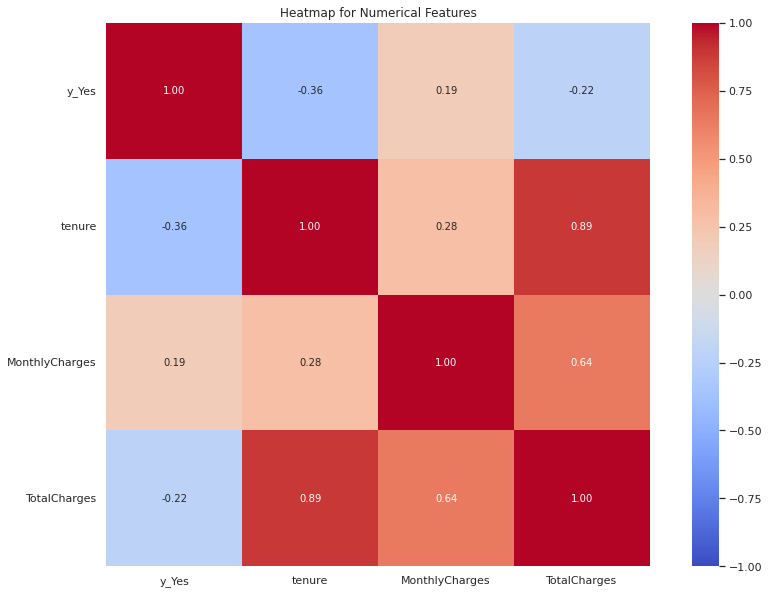

In [32]:
# Heatmap Correlation Matrix
plt.figure(figsize=(15,10))

sns.heatmap(
    pd.concat([
        pd.get_dummies(y_train, prefix='y', drop_first=True),
        X_train[num_cols]], axis=1
    ).corr('spearman'),
    annot=True, vmin=-1, vmax=1, fmt='.2f', square=True, cmap='coolwarm')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title('Heatmap for Numerical Features')

plt.show()


- `y_yes` is a dummy variable which represents the target, with a value of `0 being no and 1 being yes`
- There are low spearman correlations amongst features and target, with the highest being `tenure`
- We can see that `tenure` and `TotalCharges` are highly correlated. This makes sense, since the longer a customer subscribes, the higher the total charges will be

### Heatmap Correlation Matrix for Categorical Features

We look at the Spearman's correlation matrix to find out the relation between features and target

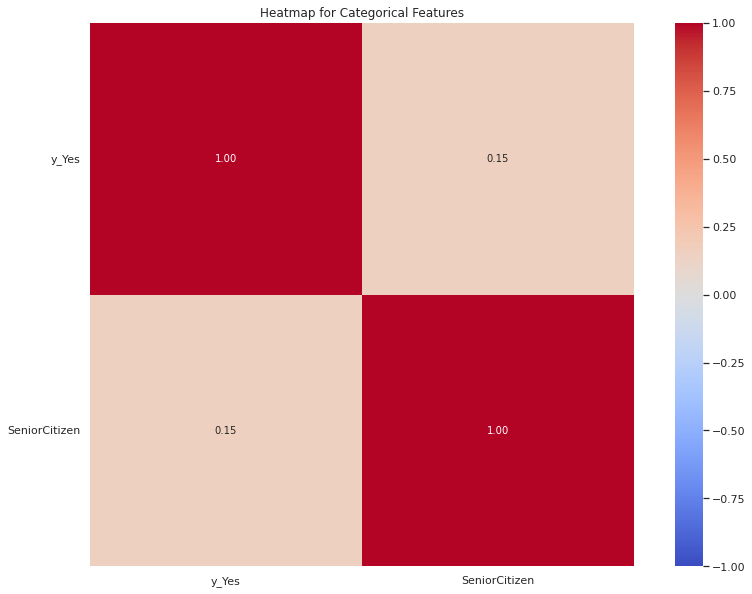

In [33]:
# Heatmap Correlation Matrix
plt.figure(figsize=(15,10))

sns.heatmap(
    pd.concat([
        pd.get_dummies(y_train, prefix='y', drop_first=True),
        X_train[nom_cols]], axis=1
    ).corr('spearman'),
    annot=True, vmin=-1, vmax=1, fmt='.2f', square=True, cmap='coolwarm')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title('Heatmap for Categorical Features')

plt.show()


- There are low spearman correlations amongst features and target
- However, since we do not really have any features that stand out, I'm going to use all features as predictors

### Categorizing Selected Features

In [34]:
# display outlier summary
outlier_summary(X_train[num_cols], 1.5).sort_values(by='dist')

,feats,skew,dist,tot_outlier,tot_outlier_pct
0,tenure,0.24,normal,0,0.0
1,MonthlyCharges,-0.22,normal,0,0.0
2,TotalCharges,0.96,skewed,0,0.0


In [35]:
# create list of numerical features with normal distribution
num_cols_norm = ['tenure', 'MonthlyCharges']

# create list of numerical features with skewed distribution
num_cols_skew = ['TotalCharges']

# create final list of nominal features
nom_cols = [
    'SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# create final list of ordinal features
ord_cols = []

Great! We have finalized our feature list.
We also separated numerical features with different types of distribution just in case we want to scale them using different methods

### List of Features

These are the predictors we're going to use

In [36]:
# print out list of predictors
print('Numerical Features:')
print(num_cols)
print('=' * 50)
print('Categorical Features:')
print(nom_cols)
print('=' * 50)
print('Ordinal Features:')
print(ord_cols)

Numerical Features:
['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Features:
['SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Ordinal Features:
[]


## Feature Engineering

### Prepare The Necessary Objects

Declare the various objects, like scaler and encoder we might use
- All categorical features will use one hot encoder

In [37]:
# declare standard scaler
std_sc = StandardScaler()

# declare min max scaling
mm_sc = MinMaxScaler()

# declare one hot encoder
ohe_enc = OneHotEncoder(handle_unknown='ignore')

# declare label encoder
label_enc = LabelEncoder()
# label_enc = OneHotEncoder(handle_unknown='ignore')

Create ColumnTransformer, SMOTENC, and PCA objects
- In ColumnTransformer, we will design so that our dataset will have the categorical features lined up after the numerical ones

In [38]:
# create column transformer object using min max scaler
scale_mm = ColumnTransformer([
    ('num_norm', std_sc, num_cols_norm),
    ('num_skew', mm_sc, num_cols_skew),
    ('nom', 'passthrough', nom_cols),
])

# create column transformer object for use after oversampling
encode = ColumnTransformer([
    ('num', 'passthrough', slice(0, 3)),
    ('nom', ohe_enc, slice(3, 19)),
])

# create smotenc object
# categorical features will be put at the end, after the numerical ones
smotenc = SMOTENC(
    categorical_features= list(range(3, 19)),
    random_state=42
)

# create pca object
pca = PCA(n_components=0.8, random_state=42)


### Scaling

We need to scale all numerical columns before oversampling

In [39]:
# scale numeric features 
X_train_scaled = scale_mm.fit_transform(X_train)
X_test_scaled = scale_mm.transform(X_test)

# print shape
print('X_train_scaled shape:', X_train_scaled.shape)
print('X_test_scaled shape:', X_test_scaled.shape)

X_train_scaled shape: (5626, 19)
X_test_scaled shape: (1407, 19)


### Oversampling

Since our data is imbalance, we need to perform oversampling

In [40]:
# oversampling using SMOTE
X_train_balanced, y_train_balanced = smotenc.fit_resample(X_train_scaled, y_train)

# print shape after oversampling
print('X_train_balanced shape:', X_train_balanced.shape)
print('y_train_balanced shape:', y_train_balanced.shape)

X_train_balanced shape: (8270, 19)
y_train_balanced shape: (8270,)


### Encoding

In [41]:
# encode categorical features
X_train_encoded = encode.fit_transform(X_train_balanced)
X_test_encoded = encode.transform(X_test_scaled)

# encode labels
y_train_final = label_enc.fit_transform(y_train_balanced)
y_test_final = label_enc.transform(y_test)

# print shape
print('X_train_encoded shape:', X_train_encoded.shape)
print('X_test_encoded shape:', X_test_encoded.shape)
print('y_train_final shape:', y_train_final.shape)
print('y_test_final shape:', y_test_final.shape)

X_train_encoded shape: (8270, 46)
X_test_encoded shape: (1407, 46)
y_train_final shape: (8270,)
y_test_final shape: (1407,)


### Dimensionality Reduction

In [42]:
# perform dimensionality reduction
X_train_final = pca.fit_transform(X_train_encoded)
X_test_final = pca.transform(X_test_encoded)

# print shape
print('X_train_final shape:', X_train_final.shape)
print('y_train_final shape:', y_train_final.shape)
print('X_test_final shape:', X_test_final.shape)
print('y_test_final shape:', y_test_final.shape)

X_train_final shape: (8270, 11)
y_train_final shape: (8270,)
X_test_final shape: (1407, 11)
y_test_final shape: (1407,)


We can see that we have reduced the number of features from 50 to 10. The dataset is now about 20% of its original size. Quite a good compression

Let's see how it would look like in 2D

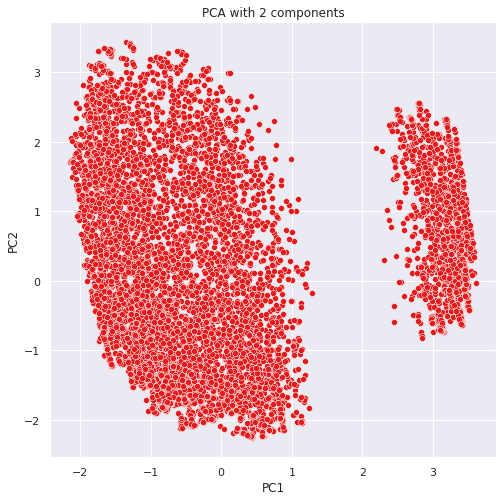

In [43]:
# plot pca with 2 components
pca_2d = PCA(n_components=2, random_state=42)
X_2d  = pca_2d.fit_transform(encode.fit_transform(X_train_balanced))

plt.figure(figsize=(8, 8))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with 2 components')
plt.show()

Preprocessing is finished

# 6. Model Definition

- Target: Predicting 


- Predictors: The features I'm going to use are

- Models: The Supervised Learning Algorithms I'm going to test

In [ ]:
# declare model

# 7. Model Training

In [ ]:
# create a dictionary of models
models = {}

## Cross Validating Base Models

Since the dataset is imbalance, we are going to evaluate our models based on **F1 Score**\
It's also important that we reduce the number of *False Negatives*, hence a high **Recall** is also important

In [ ]:
# create a dict to store the cross validation scores
cv_results = {
    'models': [],
    'f1_score_mean': [],
    'f1_score_std': [],
    'recall_score_mean': [],
    'recall_score_std': []
} 

# loop over each each models and perform cross validation
for name, model in models.items():
    # fit the model
    model.fit(X_train, y_train)
    # get cross validation scores
    scores = cross_validate(
        model, X_train, y_train,
        scoring=['f1_weighted', 'recall'],
        cv=5
    )

    # store the cross validation scores
    cv_results['models'].append(name)
    cv_results['f1_score_mean'].append(scores['test_f1_weighted'].mean().round(2))
    cv_results['f1_score_std'].append(scores['test_f1_weighted'].std().round(4))
    cv_results['recall_score_mean'].append(scores['test_recall'].mean().round(2))
    cv_results['recall_score_std'].append(scores['test_recall'].std().round(4))

# create a dataframe from the dict
cv_results_df = pd.DataFrame(cv_results)

# 8. Model Evaluation

In [ ]:
# display the dataframe sorted by f1 score

## Hyperparameter Tuning


In [ ]:
# create parameter grid

In [ ]:
# create grid search object

In [ ]:
%%time

# perform grid search

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs


In [ ]:
# print the best parameters

# print the best score

In [ ]:
# assign the best estimator to the final model

Running this grid search resulted in:
- pass

## Evaluate Grid Search Results

In [ ]:
# predict train set using the base model

# predict test set using the base model

# predict train set using the final model

# predict test set using the final model

In [ ]:
# prepare target names for classification report

### Base Model Evaluation

In [ ]:
# create classification report for train set

# create classification report for test set

In [ ]:
# plot roc curve for train set
# calculate auc score for train set

# plot roc curve for test set
# calculate auc score for test set

### Final Model Evaluation

In [ ]:
# create classification report for train set

# create classification report for test set

In [ ]:
# plot roc curve for train set
# calculate auc score for train set

# plot roc curve for test set
# calculate auc score for test set

#### Analysis
1. pass

## Save The Final Model

In [ ]:
# prepare directory for saving model
model_dir = 'models'
model_name = ''

# create directory if it does not exist
Path(model_dir).mkdir(parents=True, exist_ok=True)

# save model

# 9. Model Inference

## Load The Model

In [ ]:
# model location
model_dir = 'models'
model_name = ''
model_path = Path(model_dir, model_name)

# load model
final_svm = joblib.load(model_path)

IsADirectoryError: [Errno 21] Is a directory: 'models'

In [ ]:
# display inference set
df_inf.head()

## Inferencing

In [ ]:
%%time

# predict inference set using the final model
y_pred_inf_svm = final_svm.predict(df_inf)

In [ ]:
# create dataframe with predictions
df_inf['pred_svm'] = y_pred_inf_svm

# display inference set
df_inf

Model successfully run on inference dataset

# 10. Conclusion

## On EDA
- pass

## On Modeling
- pass

## Implication
- pass

## Future Improvement
- pass